In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#preapre a machine learning model for prediction of resale price of used cars.

In [3]:
df = pd.read_csv(r"C:\Users\faizu\OneDrive\Desktop\cars24-car-price-cleaned.csv")

In [4]:
df.info()
# this command is used to tell the structure of the dataframe.how many columns are there and the columns are integer,float etc..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [5]:
df.describe() 

,selling_price,year,km_driven,mileage,engine,max_power,age,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
count,19820.000000,19820.000000,1.982000e+04,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000
mean,6.585509,2014.561453,5.815856e+04,19.503402,1475.702381,98.122907,8.438547,0.390666,0.009586,0.492583,0.000404,0.003229,0.487841,0.802674,0.835015,0.152825
std,4.847364,3.196636,5.171563e+04,4.297784,518.571223,44.761727,3.196636,0.487912,0.097442,0.499958,0.020087,0.056734,0.499865,0.397990,0.371176,0.359828
min,0.300000,1992.000000,1.000000e+02,4.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.410000,2013.000000,3.100000e+04,16.950000,1197.000000,73.900000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,5.200000,2015.000000,5.200000e+04,19.300000,1248.000000,86.800000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,20.902500,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df["make"].nunique() 
# this command will give me the unique values present in a particular column. 

41

In [7]:
df["model"].nunique()

3233

In [8]:
#value_counts it will return the total value associated the unique value.
df["make"].value_counts() 

make
MARUTI           5650
HYUNDAI          3562
HONDA            1779
MAHINDRA         1276
TOYOTA           1189
TATA              971
FORD              900
VOLKSWAGEN        761
RENAULT           636
MERCEDES-BENZ     485
BMW               483
SKODA             422
CHEVROLET         406
AUDI              324
NISSAN            289
DATSUN            170
FIAT              113
JAGUAR             80
LAND               51
VOLVO              42
JEEP               41
MITSUBISHI         39
KIA                33
PORSCHE            25
MINI               23
MG                 19
ISUZU              12
LEXUS              10
FORCE               5
BENTLEY             4
AMBASSADOR          4
OPELCORSA           3
DAEWOO              2
PREMIER             2
MASERATI            2
DC                  2
LAMBORGHINI         1
FERRARI             1
MERCEDES-AMG        1
ROLLS-ROYCE         1
OPEL                1
Name: count, dtype: int64

In [9]:
df["model"].value_counts()

model
SWIFT DZIRE VDI              288
ALTO 800 LXI                 189
WAGON R VXI                  164
SWIFT VDI                    150
SWIFT DZIRE VXI              136
                            ... 
XUV300 W6 DIESEL               1
NANO STD BS IV                 1
FABIA 1.2 TDI ACTIVE           1
FIESTA PETROL STYLE            1
YARIS V OPTIONAL CVT BSIV      1
Name: count, Length: 3233, dtype: int64

In [10]:
"""steps for multiple linear_regression .
1) before dividing the DataFrame into 2 parts(target & input variable) we have to check whether our dataframe contains any categorical data or not
if our dataframe contains the categorical data then we have to convert the categorical data into continuous data by encoding
when the number of values in the categorical column are limited or only very less then we make use of one hot encoding but if the categorical data has large number of values then we make use of target variable encoding.
"""
# bcoz machine learning model is a mathematical model and it only understands the digit not the words.
# target encoding variable is replacing the categorical column by mean of the target variable. 

'steps for multiple linear_regression .\n1) before dividing the DataFrame into 2 parts(target & input variable) we have to check whether our dataframe contains any categorical data or not\nif our dataframe contains the categorical data then we have to convert the categorical data into continuous data by encoding\nwhen the number of values in the categorical column are limited or only very less then we make use of one hot encoding but if the categorical data has large number of values then we make use of target variable encoding.\n'

In [11]:
df["make"] = df.groupby("make")["selling_price"].transform("mean") 

In [12]:
df["model"] = df.groupby("model")["selling_price"].transform("mean") 

In [13]:
# feature scaling or normalization. 
"""feature scaling means we have to scale all the feartures in the same range.that means we will keeping all the features 0-1 so that our machine learnig model 
doesn't create a perception about any feature bcoz all features are important for us."""

"feature scaling means we have to scale all the feartures in the same range.that means we will keeping all the features 0-1 so that our machine learnig model \ndoesn't create a perception about any feature bcoz all features are important for us."

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df1 = pd.DataFrame(scaler.fit_transform(df),columns = df.columns) 

In [15]:
# minmaxscaler is the library used for feature scaling.

In [16]:
# now divide the dataframe into target feature and independent features 
from sklearn.model_selection import train_test_split

In [17]:
y = df1["selling_price"] 
x = df1.drop("selling_price",axis = 1) 
y.shape,x.shape

((19820,), (19820, 17))

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1) 
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((13874, 17), (13874,), (5946, 17), (5946,))

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
x_pred = model.predict(x_train)
y_pred = model.predict(x_test)  
x_pred

array([0.12609863, 1.00366211, 0.35705566, ..., 0.14599609, 0.25158691,
       0.08825684])

In [22]:
y_pred

array([0.0456543 , 0.21557617, 0.27368164, ..., 0.04541016, 0.13562012,
       0.50061035])

In [23]:
model.coef_

array([ 7.22337841e+11, -2.47963357e-01, -2.31812763e-01,  7.35838765e-02,
        4.74277115e-02,  7.22337841e+11,  6.58811781e-02,  8.59223108e-01,
       -7.19215628e-03, -6.97044385e-03,  6.94274435e-03,  1.32865165e-01,
        1.49250319e-02, -6.86910488e-03, -3.63590275e-03, -1.61865981e-02,
       -2.35327290e-02])

In [24]:
model.intercept_

-722337841395.1271

In [25]:
model.score(x_test,y_test)

0.9459903904944398

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


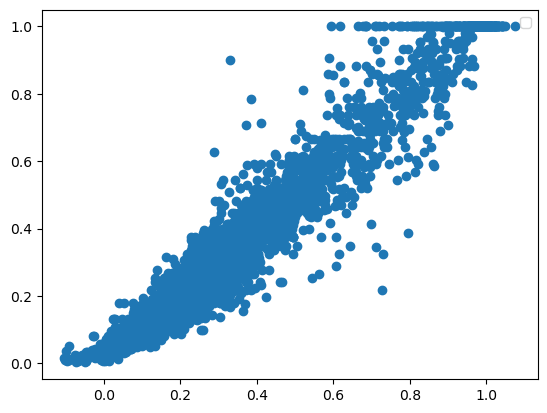

In [26]:
fig = plt.figure() 
plt.scatter(y_pred,y_test) 
plt.legend() 
plt.show() 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

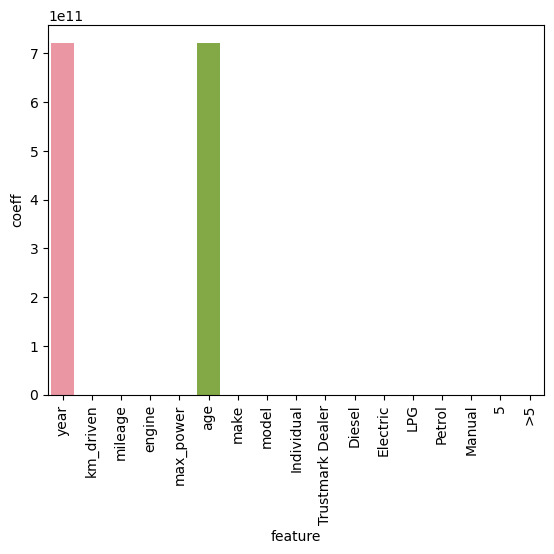

In [27]:
import seaborn as sns 
imp = pd.DataFrame(list(zip(x_test.columns,np.abs(model.coef_))),
                   columns = ['feature','coeff'])
# zip command is use to pack the different datatypes together.
sns.barplot(x = 'feature',y = 'coeff',data = imp) 
plt.xticks(rotation = 90) 

In [28]:
# r-square matrix it is the measure of how much variance in the data is captured by the regression line.(read)